In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib

### Load and describe data

In [8]:
target = 'Wind Spd (km/h)'
raw = pd.read_csv(str(pathlib.Path("../data/interim/integrated.csv")), 
                  parse_dates=True, infer_datetime_format=True, index_col=0, low_memory=False)
raw_stats = raw.describe(include='all')
# Add percentage of missing observations to data description
total_obs = raw_stats.loc['count', target]
missing_obs = raw_stats.loc['count'].apply(lambda x : round((total_obs-x) / total_obs * 100, 2))
raw_stats.loc['missing obs (%)'] = missing_obs
raw_stats

,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
count,43824.000000,43824.000000,43824.000000,43824,43803.000000,2,43802.000000,3,43797.000000,8,...,4,43805.000000,0.0,43803.000000,2,7340.000000,0.0,10124.000000,0.0,18952
unique,NaN,NaN,NaN,24,NaN,1,NaN,1,NaN,1,...,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,85
top,NaN,NaN,NaN,14:00,NaN,M,NaN,M,NaN,M,...,M,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,Mostly Cloudy
freq,NaN,NaN,NaN,1826,NaN,2,NaN,3,NaN,8,...,4,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,4942
mean,2016.000000,6.523549,15.727820,NaN,9.071429,NaN,2.959212,NaN,67.758705,NaN,...,NaN,21.979384,NaN,99.553221,NaN,29.896866,NaN,-12.500494,NaN,NaN
std,1.413842,3.448572,8.799425,NaN,11.403631,NaN,10.814715,NaN,16.465946,NaN,...,NaN,5.332091,NaN,0.765471,NaN,3.741492,NaN,6.807851,NaN,NaN
min,2014.000000,1.000000,1.000000,NaN,-26.000000,NaN,-31.600000,NaN,13.000000,NaN,...,NaN,0.000000,NaN,96.490000,NaN,25.000000,NaN,-41.000000,NaN,NaN
25%,2015.000000,4.000000,8.000000,NaN,0.600000,NaN,-4.700000,NaN,56.000000,NaN,...,NaN,24.100000,NaN,99.070000,NaN,27.000000,NaN,-17.000000,NaN,NaN
50%,2016.000000,7.000000,16.000000,NaN,9.300000,NaN,3.300000,NaN,69.000000,NaN,...,NaN,24.100000,NaN,99.570000,NaN,29.000000,NaN,-11.000000,NaN,NaN
75%,2017.000000,10.000000,23.000000,NaN,18.700000,NaN,12.000000,NaN,80.000000,NaN,...,NaN,24.100000,NaN,100.050000,NaN,32.000000,NaN,-7.000000,NaN,NaN


### Select columns of interest

In [9]:
# Drop redundant time columns and ignore flag columns.
# Discard Hmdx, Wind Chill, and Weather due to sparseness of data.
select = raw.iloc[:,[4,6,8,10,12,14,16]]

In [59]:
stats = select.describe()
stats.loc['missing'] = select.isna().sum()
stats

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
count,43803.000000,43802.000000,43797.000000,43780.000000,43801.000000,43805.000000,43803.000000
mean,9.071429,2.959212,67.758705,21.472567,16.422388,21.979384,99.553221
std,11.403631,10.814715,16.465946,10.096349,9.329768,5.332091,0.765471
min,-26.000000,-31.600000,13.000000,0.000000,0.000000,0.000000,96.490000
25%,0.600000,-4.700000,56.000000,14.000000,9.000000,24.100000,99.070000
50%,9.300000,3.300000,69.000000,24.000000,15.000000,24.100000,99.570000
75%,18.700000,12.000000,80.000000,30.000000,22.000000,24.100000,100.050000
max,35.200000,25.000000,99.000000,36.000000,80.000000,80.500000,102.210000
missing,21.000000,22.000000,27.000000,44.000000,23.000000,19.000000,21.000000


### Inspect pattern of missing values

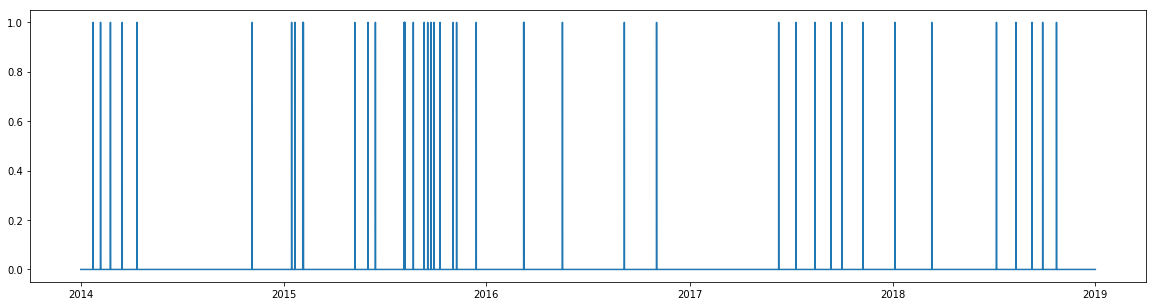

In [11]:
# Observe: 20-40 missing entries for each data column. Check the pattern of missing entries.
plt.subplots(figsize=(20,5))
plt.plot(select.isnull().any(axis=1).map(int))
plt.show()

In [46]:
# Observe: short intervals of missing data (as opposed to long gaps)
# Methods to deal with missing data: (a) persistence, (b) interpolation, (c) mean substitution, ...
clean_persist = select.fillna(method='ffill').fillna(method='bfill')
clean_interpolate = select.interpolate(method='linear', limit_direction='both')
clean_mean = select.fillna(stats.loc['mean'], axis=0)

In [56]:
# Timestamps with missing data
#select[select.isnull().any(axis=1)]

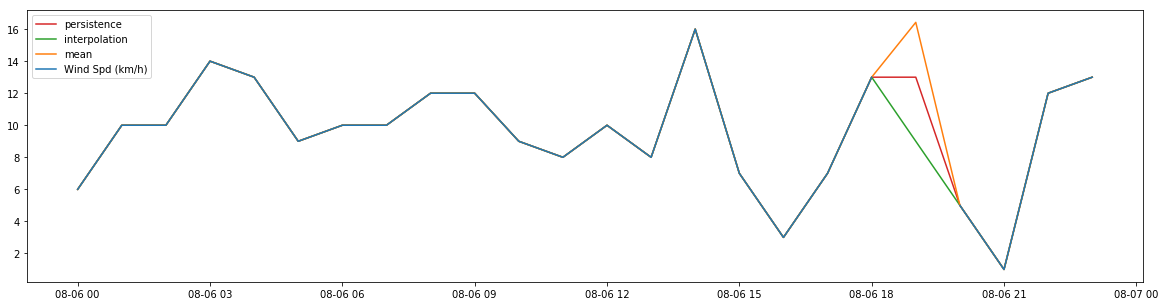

In [58]:
# Show how different methods of data imputation work
date = '2015-08-06'
plt.subplots(figsize=(20,5))
plt.plot(clean_persist.loc[date, target], c='C3', label='persistence')
plt.plot(clean_interpolate.loc[date, target], c='C2', label='interpolation')
plt.plot(clean_mean.loc[date, target], c='C1', label='mean')
plt.plot(select.loc[date, target])
plt.legend()
plt.show()

In [49]:
# Choose linear interpolation because it reflects the change of weather over short periods of time.